# Задание 2.

**NB. Все упражнения ниже нужно делать без использования циклов Python в явном (`while`, `for`) и неявном виде (list comprehension, `map`, `reduce` и пр)**

Задания по манипуляциям с массивами чаще всего решаются в одно/два выражения. 

In [442]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

A = np.random.randint(0, 100, size=(200, 50))
A

array([[21, 36, 87, ...,  0,  0, 36],
       [53,  5, 38, ..., 64, 95, 69],
       [94,  0, 50, ..., 38, 19, 46],
       ...,
       [54, 53, 56, ..., 82, 21, 30],
       [97, 32, 71, ..., 15, 77, 84],
       [16, 80, 49, ..., 81, 74, 70]])

# Задание 2.1 (2 балла)

Сгенерируйте новый массив, в котором столбцы массива `A` переставлены в случайном порядке

In [443]:
B = A.copy()
np.transpose(np.random.shuffle(np.transpose(B)))
B

array([[ 0, 99, 88, ..., 87, 23, 31],
       [64, 68, 57, ..., 65, 85, 79],
       [38, 46, 73, ..., 77,  2, 43],
       ...,
       [82, 22, 93, ..., 80, 96, 19],
       [15, 72, 64, ..., 53, 95, 14],
       [81, 30, 51, ..., 33, 72, 29]])

# Задание 2.2 (5 баллов)

Сгенерируйте новый массив, который содержит только те строки массива `A`, в которых: 
- сумма элементов по четным столбцам (индексы $0, 2, \ldots$) больше среднего значения (по всему массиву) суммы элементов по нечетным столбцам (индексы $1, 3, \ldots$) 

In [444]:
p = A[:,1::2].sum(axis=1).mean()
C = A[A[:,::2].sum(axis=1) > p]
C

array([[21, 36, 87, ...,  0,  0, 36],
       [53,  5, 38, ..., 64, 95, 69],
       [94,  0, 50, ..., 38, 19, 46],
       ...,
       [24, 75, 44, ...,  9, 88, 14],
       [30,  3, 11, ..., 11, 68, 33],
       [54, 53, 56, ..., 82, 21, 30]])

# Задача 2.3 (3 балла)

Найдите индекс строки массива `A`, в которой разница между максимальным и минимальным элементом максимальна

In [445]:
np.argmax(np.amax(A, axis=1) - np.amin(A, axis=1))

0

# Задание 2.4 (7 баллов)

Сгенерируйте массив той же размерности, что и `A`, но в котором каждый элемент заменен на его порядковый номер (начиная с 1) в отсортированном по возрастанию массиве из элементов `A`

Если `A` выглядит так:
$$
\begin{pmatrix}
12 & 14\\
1 & 2
\end{pmatrix}
$$
то результат должен быть
$$
\begin{pmatrix}
3 & 4\\
1 & 2
\end{pmatrix}
$$

*Tip: рассмотрите возможность неоднократного применения [argsort()](https://numpy.org/doc/stable/reference/generated/numpy.ndarray.argsort.html)*

In [446]:
n = np.shape(A)[0]
m = np.shape(A)[1]
E =  np.argsort(np.argsort(A.reshape(m * n))).reshape(n, m) + 1
E

array([[2122, 3663, 8793, ...,   95,   94, 3682],
       [5379,  619, 3873, ..., 6494, 9559, 7003],
       [9422,   32, 5134, ..., 3970, 1995, 4755],
       ...,
       [5522, 5406, 5751, ..., 8266, 2115, 3073],
       [9770, 3265, 7138, ..., 1549, 7808, 8455],
       [1670, 8029, 5036, ..., 8204, 7498, 7063]], dtype=int64)

# Задание 2.5 (2 балла)

Примените $\min-\max$ - нормализацию к строкам массива `A`. То есть нужно получить новый массивы, в каждой строке которого максимальный элементы равен $1$, минимальный - $0$. 

In [447]:
max_e = np.amax(A)
min_e = np.amin(A)
F = (A - min_e) / (max_e - min_e)
F

array([[0.21212121, 0.36363636, 0.87878788, ..., 0.        , 0.        ,
        0.36363636],
       [0.53535354, 0.05050505, 0.38383838, ..., 0.64646465, 0.95959596,
        0.6969697 ],
       [0.94949495, 0.        , 0.50505051, ..., 0.38383838, 0.19191919,
        0.46464646],
       ...,
       [0.54545455, 0.53535354, 0.56565657, ..., 0.82828283, 0.21212121,
        0.3030303 ],
       [0.97979798, 0.32323232, 0.71717172, ..., 0.15151515, 0.77777778,
        0.84848485],
       [0.16161616, 0.80808081, 0.49494949, ..., 0.81818182, 0.74747475,
        0.70707071]])

# Задание 2.6 (2 балла)

Сгенерируйте новый трехмерный массив, размерности $10 \times 200 \times 50$. Подмассивы по нулевой оси должны состоять из элементов `A`, умноженных на $1 - 10$ соответственно

In [448]:
n = np.shape(A)[0]
m = np.shape(A)[1]
x1 = np.ones((10, n * m))
x2 = (np.arange(10) + 1).reshape(10, 1)
G = A * (x1 * x2).reshape(10, n, m)
G

array([[[ 21.,  36.,  87., ...,   0.,   0.,  36.],
        [ 53.,   5.,  38., ...,  64.,  95.,  69.],
        [ 94.,   0.,  50., ...,  38.,  19.,  46.],
        ...,
        [ 54.,  53.,  56., ...,  82.,  21.,  30.],
        [ 97.,  32.,  71., ...,  15.,  77.,  84.],
        [ 16.,  80.,  49., ...,  81.,  74.,  70.]],

       [[ 42.,  72., 174., ...,   0.,   0.,  72.],
        [106.,  10.,  76., ..., 128., 190., 138.],
        [188.,   0., 100., ...,  76.,  38.,  92.],
        ...,
        [108., 106., 112., ..., 164.,  42.,  60.],
        [194.,  64., 142., ...,  30., 154., 168.],
        [ 32., 160.,  98., ..., 162., 148., 140.]],

       [[ 63., 108., 261., ...,   0.,   0., 108.],
        [159.,  15., 114., ..., 192., 285., 207.],
        [282.,   0., 150., ..., 114.,  57., 138.],
        ...,
        [162., 159., 168., ..., 246.,  63.,  90.],
        [291.,  96., 213., ...,  45., 231., 252.],
        [ 48., 240., 147., ..., 243., 222., 210.]],

       ...,

       [[168., 288., 696

# Задание 2.7 (2 балла)

Создайте новый массив, такой же размерности, как и `A`, в котором сначала сгруппированы четные столбцы `A`, потом  нечетные. Используйте [np.concat()](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) 

In [449]:
even = A[:,::2]
odd = A[:,1::2]
H = np.concatenate((even, odd), axis=1)
H

array([[21, 87, 88, ..., 28,  0, 36],
       [53, 38, 79, ..., 41, 64, 69],
       [94, 50, 34, ..., 54, 38, 46],
       ...,
       [54, 56, 58, ..., 48, 82, 30],
       [97, 71, 24, ..., 78, 15, 84],
       [16, 49, 26, ..., 98, 81, 70]])

# Задание 2.8 (2 балла)

Посчитайте количество строк массива `A`, в который все элементы больше 5. Используйте [np.all()](https://numpy.org/doc/stable/reference/generated/numpy.all.html) 

In [450]:
np.all(A > 5, axis=1).sum()

6

# Задание 2.9 (2 балла)

Поделите массив `A` горизонтально на 10 частей и создайте новый массив размерности $20 \times 50$, который является средним этих частей. Используйте [np.split()](https://numpy.org/doc/stable/reference/generated/numpy.split.html)

In [483]:
np.mean(np.split(A, 10), axis=0)

array([[46.3, 36.5, 57.8, 56. , 55.5, 60.5, 50.4, 55.4, 50.9, 55.3, 53.7,
        39.1, 63.5, 56.1, 50.1, 46.1, 63.9, 57.9, 39.3, 52.8, 53.9, 55.8,
        51.2, 38.7, 51.4, 51.8, 57.9, 52.8, 51.9, 54.7, 39.2, 60.8, 27.8,
        64.4, 69.1, 52.9, 32.7, 52.9, 57.4, 55.6, 61.4, 59.2, 38. , 48.7,
        50.2, 40.5, 57.7, 49.5, 47.1, 56.5],
       [54.6, 52. , 54.8, 47.1, 30.7, 34.9, 62.1, 45.8, 59.2, 37.4, 43.8,
        29. , 49.7, 61.4, 38.3, 60.5, 58. , 46. , 42.6, 48.7, 57.6, 39.3,
        37.8, 46.3, 55.5, 58.7, 46. , 38.6, 59.5, 50.1, 50.5, 47.1, 48.1,
        50.5, 45.3, 49.8, 45.2, 61.1, 46.4, 39.4, 54.2, 56.5, 49.6, 37. ,
        50.1, 38.7, 57.5, 49. , 46.8, 52.5],
       [46.5, 48.3, 54.8, 34.5, 59.5, 46.8, 52.1, 56.3, 53.3, 43.1, 69. ,
        43.7, 51. , 36.3, 45. , 58.1, 46.7, 49.8, 47.1, 59.3, 54.8, 56.8,
        60.7, 56.9, 65.6, 55.3, 49.3, 47.4, 40.8, 44.8, 49.6, 57.7, 41.2,
        40.1, 46. , 72.6, 49.8, 46.4, 46. , 50.1, 38.9, 36.4, 57.4, 69.2,
        50.2, 58.9, 47

# Задание 2.10 (4 балла)

"Разверните" массив `A` в одномерный массив. Оставьте в нём только уникальные элементы в том же порядке, в котором они встречаются в массиве. Используйте [np.unique()](https://numpy.org/doc/stable/reference/generated/numpy.unique.html)

In [452]:
_, ind = np.unique(A.reshape(np.size(A)), return_index=True)
J = A.reshape(np.size(A))[np.sort(ind)]
J

array([21, 36, 87, 70, 88, 12, 58, 65, 39, 46, 81, 37, 25, 77, 72,  9, 20,
       80, 69, 79, 47, 64, 82, 99, 49, 29, 19, 14, 32, 57, 31, 74, 23, 35,
       75, 55, 28, 34,  0, 53,  5, 38, 17,  4, 42,  1, 41, 11, 91, 84, 68,
        6,  3, 76, 52, 78, 15, 13, 85, 48, 95, 94, 50, 93, 98, 73, 10, 43,
       59,  2, 62, 67, 27, 86, 51, 54, 56, 60, 30, 24, 40, 26, 66, 61, 96,
       16, 83, 33, 71, 18, 44, 89, 90, 45, 97,  8, 22, 92, 63,  7])

# Задание 2.11 (3 балла)

Создайте одномерный массив размерности $200$, в котором каждый элемент - евклидово расстояние между соответствующей строкой `A` и "средней" строкой `A`

In [453]:
def dist(x):
    str_m = A[int(np.shape(A)[0] / 2), :]
    return (((x - str_m) ** 2).sum()) ** 0.5


K = np.apply_along_axis(dist, 1, A)
K

array([240.62418831, 268.97955313, 264.97547056, 307.97077783,
       254.21054266, 248.45321491, 310.04677067, 257.32469761,
       280.16245287, 287.45260479, 299.79993329, 298.21804104,
       298.66536458, 287.36910064, 280.38009915, 298.99163868,
       272.28294107, 304.95245531, 255.20971768, 311.53651471,
       334.46076003, 257.80806814, 272.51972406, 280.45498748,
       262.03053257, 300.87040399, 213.46662503, 292.87881453,
       308.12010645, 323.68194265, 271.57687678, 273.47577589,
       279.94463738, 297.63400343, 296.80970335, 317.54369778,
       269.64050141, 297.64072302, 284.89998245, 292.00171232,
       294.29746856, 288.17529388, 312.64196775, 285.67989079,
       263.61714664, 262.72609311, 259.27591481, 268.25174743,
       306.13885738, 314.95396489, 279.4888191 , 278.84404243,
       249.06826374, 315.24434967, 285.91257405, 257.40435117,
       300.58443073, 246.3331078 , 255.12741915, 285.21570784,
       287.66994977, 311.57503109, 298.25995373, 265.79

# Задание 2.12 (2 балла)

Создайте новый массив, который состоит из элементов `A`, измененных по следующим правилам:
- если элемент меньше $50$, то он умножается на $2$
- в противном случае он умножается на $3$

Используйте [np.where()](https://numpy.org/doc/stable/reference/generated/numpy.where.html)

In [454]:
np.where(A < 50, A * 2, A * 3)

array([[ 42,  72, 261, ...,   0,   0,  72],
       [159,  10,  76, ..., 192, 285, 207],
       [282,   0, 150, ...,  76,  38,  92],
       ...,
       [162, 159, 168, ..., 246,  42,  60],
       [291,  64, 213, ...,  30, 231, 252],
       [ 32, 240,  98, ..., 243, 222, 210]])

# Задание 2.13 (7 баллов)

Разверните массив `A` в одномерный массив. Создайте три новых массива, подсчитав скользящие средние по окнам $3$, $5$, $10$. Найдите сумму этих массивов, выровнив из размерности нулями справа

*Tip: реализуйте функцию, которая считает скользящее среднее. Используйте [np.cumsum()](https://numpy.org/doc/stable/reference/generated/numpy.cumsum.html) или [np.convolve()](https://numpy.org/doc/stable/reference/generated/numpy.convolve.html)*

In [455]:
def moving_average(x, n) :
    a = np.cumsum(x)
    a[n:] = a[n:] - a[:-n]
    return a[n - 1:] / n

a_size = np.size(A)
M = A.reshape(a_size)

M3 = np.zeros(a_size)
M5 = np.zeros(a_size)
M10 = np.zeros(a_size)
M3[:a_size - 2] = moving_average(M, 3)
M5[:a_size - 4] = moving_average(M, 5)
M10[:a_size - 9] = moving_average(M, 10)

N = M3 + M5 + M10
N

array([164.8       , 201.13333333, 214.66666667, ...,  75.        ,
         0.        ,   0.        ])

# Задание 2.14 (8 баллов)

Постройте график функции $$f(x) = (5  \sin(2x) - \cos^2(x) - 1 + |x^3| - x^2) / (x^2 + 1)$$  

и производной от этой функции.  Найдите минимум с помощью `scipy` и обозначьте его на графике. На этой же оси постройте графики скользящего среднего этой функции с окном $1$, $2$, $5$.

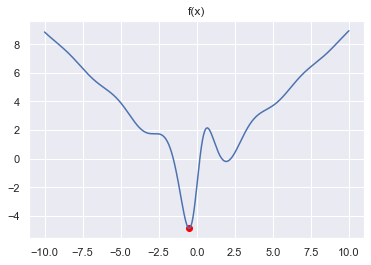

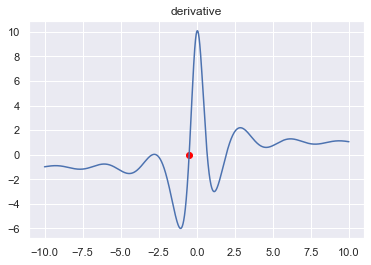

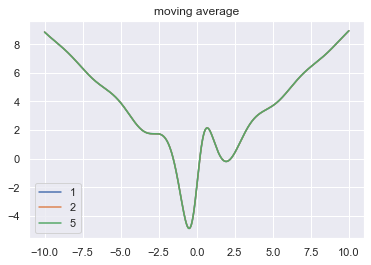

In [456]:
import matplotlib.pyplot as plt
from scipy.optimize import minimize

def f(x):
    return (5 * np.sin(2 * x)  -np.cos(x) ** 2 - 1 + abs(x ** 3) - x ** 2) / (x ** 2 + 1)

x = np.linspace(-10, 10, 10000)
dx = x[1]-x[0]
y = f(x)
dydx = np.gradient(y, dx)

x_min = minimize(f, 0).x[0]

plt.plot(x, y)
plt.scatter(x_min, f(x_min), color = 'red')
plt.title('f(x)')
plt.show()
plt.plot(x, dydx)
plt.scatter(x_min, 0, color = 'red')
plt.title('derivative')
plt.show()

plt.plot(x, moving_average(y, 1))
plt.plot(x[:-1], moving_average(y, 2))
plt.plot(x[:-4], moving_average(y, 5))
plt.legend(['1', '2', '5'])
plt.title('moving average')
plt.show()


# Задание 2.15 (10 баллов)

Есть следующий алгоритм семплинирования, на вход функции подается вектор из целых положительных чисел и число семплов.

In [457]:
from typing import List 

def sample(x: List[int], c: int) -> List[int]:
    assert len(x) > 0
    
    s = np.sum(x)
    res = []
    for _ in range(c):
        val = s * np.random.random()
        cur, idx = 0, 0        
        while cur + x[idx] <= val:
            cur += x[idx]
            idx += 1
            
        res.append(idx)
    return res

np.random.seed(0)            
sample([50, 3, 1, 7, 20], 5)   

[0, 3, 0, 0, 0]

Реализуйте данный алгоритм более оптимальным способом на массивах `numpy`, без использования циклов. Проверьте корректность и идентичность алгоритмов семплирования с помощью статистических тестов.

In [458]:
def sample_np(x: np.ndarray, c: int) -> np.ndarray:
    assert np.size(x) > 0
    
    s = np.sum(x)
    cs = np.cumsum(x)
    val = np.random.random(c) * s
    w = np.vectorize(lambda i: np.where(cs>i)[0][0])
    ans = w(val)
    return ans


np.random.seed(0)
sample_np([50, 3, 1, 7, 20], 5)


array([0, 3, 0, 0, 0], dtype=int64)

# Задание 2.16 (5 баллов)

Есть следующий алгоритм "случайного блуждания"

In [459]:
import random 

def walk(n: int):
    cur_position = 0
    for i in range(n):
        cur_position += random.choice([-3, -1, 0, 2, 3])

    return cur_position

walk(10_000)

1628

Реализуйте более эффективную версию с помощью `numpy`, сравните производительность (используя, например, magic `timeit`). Воспользовавшись [kdeplot()](https://seaborn.pydata.org/generated/seaborn.kdeplot.html) или аналогами, постройте график распределения значений `walk(10_000)` на каком-то разумном числе запусков. 

исходное время 4.050701500000287
новое время 0.3297963000004529


<AxesSubplot:ylabel='Density'>

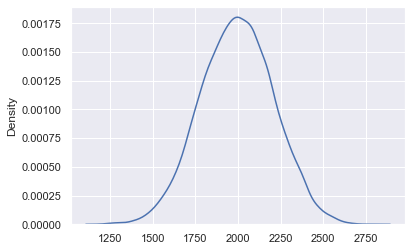

In [466]:
import timeit

@np.vectorize
def walk_np(n: int):
    return np.sum(np.random.choice([-3, -1, 0, 2, 3], n))

print('исходное время', timeit.timeit(lambda: walk(10_000), number=1000))
print('новое время', timeit.timeit(lambda: walk_np(10_000), number=1000))

x = np.ones(10000, dtype=np.int64) * 10_000
y = walk_np(x)

sns.kdeplot(data=y)

# Задание 2.17 (5 баллов)

Имеется функция, которая проделывает достаточно странные манипуляции с массивом `numpy`

In [469]:
import numpy.typing as npt

def strange_conv(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t


a = np.random.random((10000, 10000))
strange_conv(a)


0.4681908505419918

Оптимизируйте данную функцию с помощью (2 на выбор):
- [Numba](https://numba.pydata.org)
- `Cython` (+5 баллов)
- [Taichi](https://github.com/taichi-dev/taichi) (+5 баллов)
- `Pythran `[[1]](https://pythran.readthedocs.io/en/latest/), [[2]](https://serge-sans-paille.github.io/pythran-stories/pythran-tutorial.html) (+2 балла)

Сравните производительность.

In [475]:
%load_ext cython

In [480]:

%%cython
cpdef float strange_conv_cython(a):
    cdef int x = a.shape[0]
    cdef int y = a.shape[1]

    cdef float t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t

In [481]:
from numba import njit


@njit
def strange_conv_numba(a: npt.NDArray[np.float64]) -> np.float64:
    x = a.shape[0]
    y = a.shape[1]

    t = 1.
    for y in range(y - 5):
        for x in range(x - 3):
            c = 1.5 * a[y+1, x+2] - a[y+5, x+3] * a[y, x] + 0.2 * a[y+4, x]
            t = 0.2 * t + 0.8 * c

    return t



a = np.random.random((10000, 10000))

print('исходное время', timeit.timeit(lambda: strange_conv(a), number=10))
print('время numba', timeit.timeit(lambda: strange_conv_numba(a), number=10))
print('время cython', timeit.timeit(lambda: strange_conv_cython(a), number=10))


исходное время 140.4121621000013
время numba 0.4600769999997283
время cython 105.83149729999786
